In [26]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader.data  as web
import math
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing

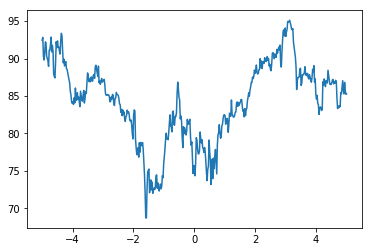

In [5]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2016, 11, 20)
df = web.DataReader("XOM", "yahoo", start, end)
df = df[['Open',  'High',  'Low',  'Close', 'Volume']]

Y = np.array(df['Close'])
X = np.linspace(-5, 5, len(Y))

plt.plot(X, Y)

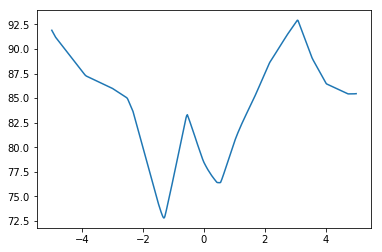

In [23]:
from sklearn.neural_network import MLPRegressor
X = X.reshape(-1, 1)
Y = Y.reshape(-1)
mlp = MLPRegressor(hidden_layer_sizes=[500,500,500], max_iter=10000)
mlp.fit(X, Y)
pred = mlp.predict(X)

plt.plot(X, pred)

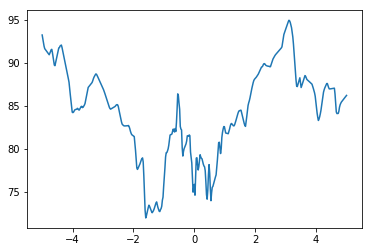

In [24]:
try:
    from uc.mlp import MLP
except:
    !pip install uc
    from uc.mlp import MLP
    
# 3 hidden layers of size 8
mlp = MLP(layer_size=[1, 8, 8, 8, 1], rate_init=0.01, 
    output_range=None,
    activation="a2m2l",
    leaky=-0.2,
    loss_type="mse", epoch_train=16000, epoch_decay=800, verbose=0
)
mlp.fit(X, Y)
pred = mlp.predict(X)

plt.plot(X, pred)